In [1]:
%cd C:\Users\yukir\Documents\GitHub\sign_detection\py

C:\Users\yukir\Documents\GitHub\sign_detection\py


In [2]:
from machine_learning import *
from basic_preprocessing import *

In [3]:
%cd C:\Users\yukir\Documents\Monicas_workspace\study

C:\Users\yukir\Documents\Monicas_workspace\study


### Data load

In [4]:
data_path = 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Sign detection\\machine_learning\\Dataset\\multi_to SGD\\'

In [5]:
get_file_list(data_path)

['C:\\Users\\yukir\\Documents\\Monicas_workspace\\Sign detection\\machine_learning\\Dataset\\multi_to SGD\\fragile',
 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Sign detection\\machine_learning\\Dataset\\multi_to SGD\\handle',
 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Sign detection\\machine_learning\\Dataset\\multi_to SGD\\up',
 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Sign detection\\machine_learning\\Dataset\\multi_to SGD\\wet']

In [6]:
categories = ['fragile', 'handle', 'up', 'wet']

In [7]:
data = data_for_ml(categories, data_path, 200)

C:\Users\yukir\Documents\Monicas_workspace\Sign detection\machine_learning\Dataset\multi_to SGD\fragile
C:\Users\yukir\Documents\Monicas_workspace\Sign detection\machine_learning\Dataset\multi_to SGD\handle
C:\Users\yukir\Documents\Monicas_workspace\Sign detection\machine_learning\Dataset\multi_to SGD\up
C:\Users\yukir\Documents\Monicas_workspace\Sign detection\machine_learning\Dataset\multi_to SGD\wet
data수:  688


In [8]:
features, labels = feature_label_maker(data)

features:  688
features ex:  [161 161 161 ... 169 169 169]
feature shape:  (40000,)
-----------------------------
labels:  688
labels ex:  0
labels shape:  (40000,)


In [9]:
for i in categories:
    img_path = data_path+i+'\\'
    print(i, count_img(img_path))

이미지 수 301
fragile None
이미지 수 103
handle None
이미지 수 171
up None
이미지 수 113
wet None


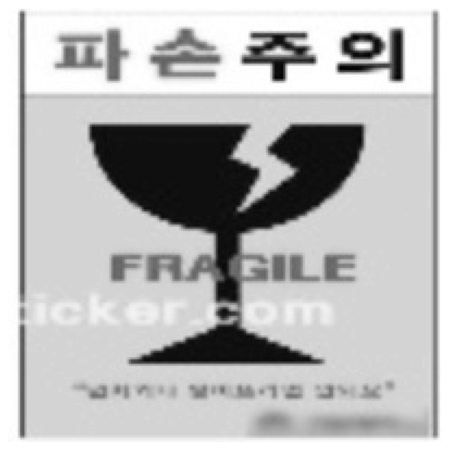

fragile


In [10]:
for_test = features[4]
for_test_img = for_test.reshape(200,200)
show(for_test_img)
print(categories[labels[0]])

### train_test_split

In [11]:
Counter(labels)

Counter({0: 301, 1: 103, 2: 171, 3: 113})

In [12]:
# 1=fragile(301개)
y = (labels==2).astype('int')
Counter(y)

Counter({0: 517, 1: 171})

In [13]:
len(features) == len(y)

True

In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.2, random_state=42)

In [16]:
from collections import Counter

print(Counter(y_train))
print(Counter(y_test))

#fragile 232개

Counter({0: 401, 1: 149})
Counter({0: 116, 1: 22})


### Train & Model Selection

In [17]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SVC(random_state=42))
ovo_clf.fit(X_train, y_train)
y_pr_ovo = cross_val_predict(ovo_clf, X_train, y_train, cv=5, method='decision_function')
fpr_ovo, tpr_ovo, thresholds_ovo = roc_curve(y_train, y_pr_ovo)

In [18]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
y_pr_rf = cross_val_predict(rf_clf, X_train, y_train, cv=5, method='predict_proba')
y_pr_rf_scores = y_pr_rf[:,1] #양성클래스
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, y_pr_rf_scores)

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


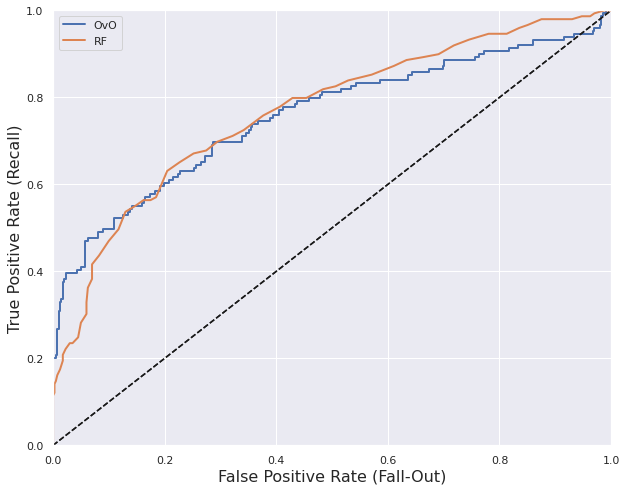

In [19]:
plt.plot()
plot_roc_curve(fpr_ovo, tpr_ovo,'OvO')
plot_roc_curve(fpr_rf, tpr_rf,'RF')
plt.legend()
plt.show()

In [20]:
#RF
y_train_pred_forest = cross_val_predict(rf_clf, X_train, y_train, cv=5)
print('(RF)roc_auc',roc_auc_score(y_train, y_pr_rf_scores))
print("(RF)Precision Score: ", precision_score(y_train, y_train_pred_forest))
print("(RF)Recall Score: ", recall_score(y_train, y_train_pred_forest))

(RF)roc_auc 0.7668998644328775
(RF)Precision Score:  0.7755102040816326
(RF)Recall Score:  0.2550335570469799


In [21]:
#OvO
y_train_pred_ovo = cross_val_predict(ovo_clf, X_train, y_train, cv=5)
print('(OvO)roc_auc',roc_auc_score(y_train, y_pr_ovo))
print("(OvO)Precision Score: ", precision_score(y_train, y_train_pred_ovo))
print("(OvO)Recall Score: ", recall_score(y_train, y_train_pred_ovo))

(OvO)roc_auc 0.756665383521063
(OvO)Precision Score:  0.9375
(OvO)Recall Score:  0.20134228187919462


### Model Evaluation

In [22]:
confusion_matrix(y_train, y_train_pred_ovo)

array([[399,   2],
       [119,  30]], dtype=int64)

In [23]:
confusion_matrix(y_train, y_train_pred_forest)

array([[390,  11],
       [111,  38]], dtype=int64)

In [24]:
import seaborn as sns

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


오차 행렬
[[116   0]
 [ 18   4]]
정확도: 0.8696, 정밀도: 1.0000, 재현율: 0.1818,    F1: 0.3077, AUC:0.5909


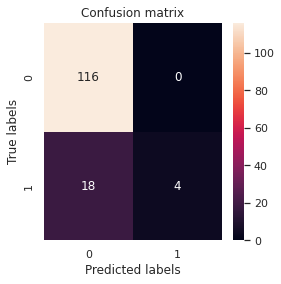

In [25]:
pred = ovo_clf.predict(X_test)
confusion = get_clf_eval(y_test, pred)

confusion_plot(confusion, 4)

오차 행렬
[[113   3]
 [ 16   6]]
정확도: 0.8623, 정밀도: 0.6667, 재현율: 0.2727,    F1: 0.3871, AUC:0.6234


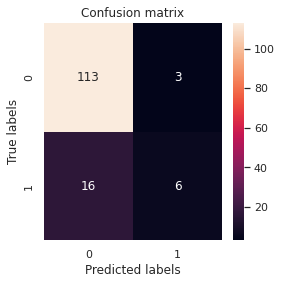

In [26]:
#우연히 같음
pred_rf = rf_clf.predict(X_test)
confusion_rf = get_clf_eval(y_test, pred_rf)

confusion_plot(confusion_rf, 4)

### Curve

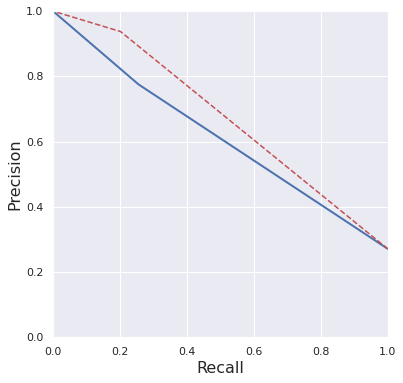

In [27]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred_forest)
precisions_ovo, recalls_ovo, thresholds_ovo = precision_recall_curve(y_train, y_train_pred_ovo)
plt.figure(figsize=(6,6))
plot_precision_vs_recall(precisions, recalls)
plt.plot(recalls_ovo, precisions_ovo,"r--")